# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Firman Fitrah Ramadhan
- **Email:** firmanfitrahramadhan38@gmail.com
- **ID Dicoding:** firman_fitrah_ramadhan_XNq4

## Menentukan Pertanyaan Bisnis

- Bagaimana tren dari peminjaman dalam kurun waktu setahun berdasarkan musim
- Apakah cuaca menjadi salah satu faktor yang mempengaruhi jumlah peminjaman

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [38]:
df = pd.read_csv("day.csv", delimiter=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Membaca data dalam format csv dan menampilkan 5 baris pertama dari data tersebut
- Mendapatkan data penting seperti hari (dteday), musim (season), cuaca (weathersit), dan jumlah peminjaman (cnt)

### Assessing Data

In [39]:
print("jumlah duplikasi yang ada:", df.duplicated().sum())
df.describe()
df.info()
df.isna().sum()
print(df.columns)

jumlah duplikasi yang ada: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', '

**Insight:**
- Memastikan bahwa data tidak terdapat missing value
- Memeriksa apakah terdapat duplikasi data

### Cleaning Data

In [40]:
df.drop(columns=["instant"], inplace=True)
df["season"] = df["season"].astype("category")
df["weathersit"] = df["weathersit"].astype("category")


**Insight:**
- Menghapus tabel instant yang tidak memiliki makna data apapun
- Menjadikan season dan weathersit menjadi tipe kategori

## Exploratory Data Analysis (EDA)

### Explore ...

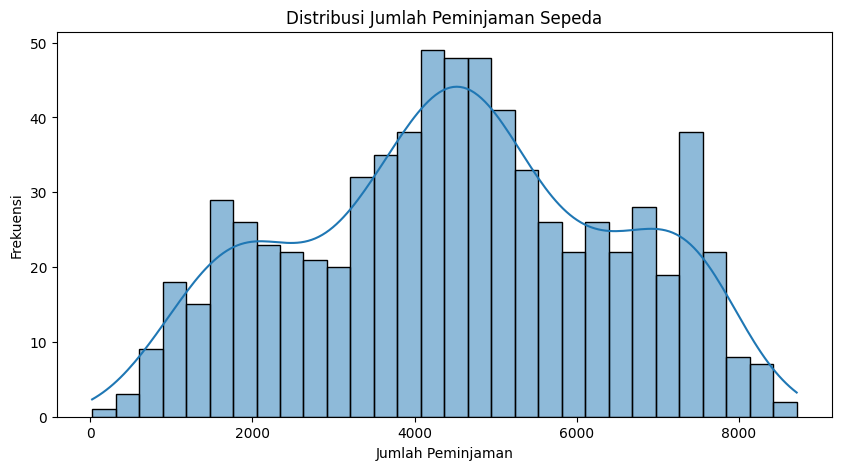

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()


**Insight:**
- Terdapat beberapa puncak dengan peminjaman tertinggi
- Menampilkan kde dalam histogram untuk melihat pola distribusi data lebih jelas

## Visualization & Explanatory Analysis

### Pertanyaan 1:

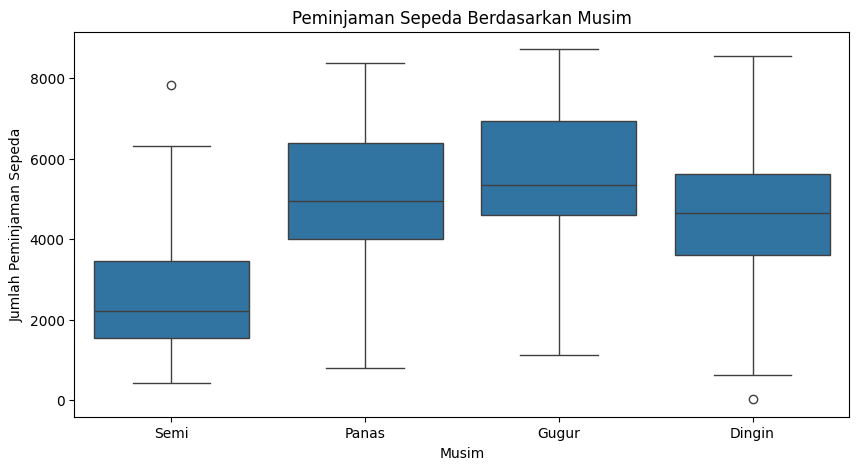

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x="season", y="cnt", data=df)
plt.title("Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Semi","Panas","Gugur","Dingin"])
plt.show()


### Pertanyaan 2:

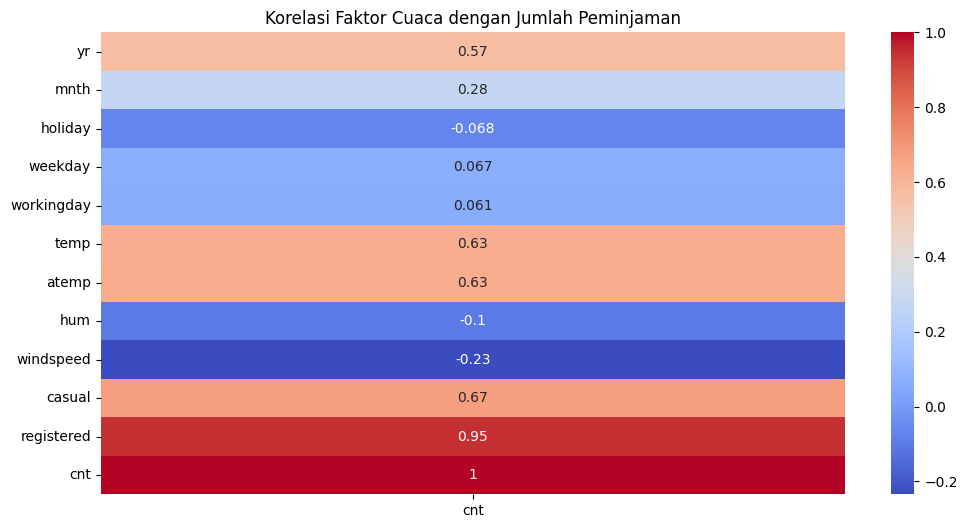

In [43]:
num_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(num_df.corr()[["cnt"]], annot=True, cmap="coolwarm")
plt.title("Korelasi Faktor Cuaca dengan Jumlah Peminjaman")
plt.show()


**Insight:**
- Menggunakan boxplot untuk melihat distribusi dan membantu dalam mengidentifikasi outlier dalam musim
- Musim panas dan gugur menunjukkan bahwa jumlah peminjaman lebih bervariasi dibanding musim lainnya
- Musim ssemi dan dingin memiliki beberapa outlier yang didapat dari hari khusus atau kondisi cuaca yang menjadi sangat ekstrem
- Korelasi terhadap suhu yang dimana semakin hangat suhu akan semakin banyak peminjaman sepeda

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2